이미지 출처 1 : http://makething.tistory.com/entry/9%EC%9B%94-%EB%85%BC%EB%A6%AC%EA%B2%8C%EC%9D%B4%ED%8A%B8

이미지 출처 2 : http://www.minecraftforum.net/forums/minecraft-discussion/redstone-discussion-and/341894-xor-gate-with-2-and-1-not-1-or

퍼셉트론의 한계

XOR 게이트는 배타적 논리합이라는 논리 회로로 X1 이나 X2 가 1일 때만 결과 값 1을 출력

[XOR 게이트 진리표]

| X1 | X2 |  Y  |
| :--: | :--: | :--: |
| 0	 | 0  | 0  |
| 1	 | 0  | 1  |
| 0	 | 1  | 1  |
| 1	 | 1  | 0  |

In [1]:
from IPython.display import Image
Image(filename='gate.jpg')

In [2]:
Image(filename='XOR.png')

[XOR 게이트 진리표]

| X1 | X2 | S1 | S2 |  Y  |
| :--: | :--: | :--: | :--: | :--: |
| 0 | 0  | 1 | 0  | 0  |
| 1 | 0  | 1 | 1  | 1  |
| 0 | 1  | 1 | 1  | 1  |
| 1 | 1  |  0 | 1  |0  |

In [4]:
import numpy as np

In [5]:
def AND_BIAS(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [6]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [7]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [8]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND_BIAS(s1, s2)
    return y

In [9]:
print ('XOR(0, 0) => ', XOR(0, 0))

XOR(0, 0) =>  0


In [10]:
print ('XOR(1, 0) => ', XOR(1, 0))

XOR(1, 0) =>  1


In [11]:
print ('XOR(0, 1) => ', XOR(0, 1))

XOR(0, 1) =>  1


In [12]:
print ('XOR(1, 1) => ', XOR(1, 1))

XOR(1, 1) =>  0


XOR은 하단 그림처럼 다층 구조의 네트워크로 왼쪽부터 0~2계층이 존재

AND. OR, XAND는 단층 계층인데 반해, XOR는 2층 퍼셉트론 임

층이 여러 개인 퍼셉트론을 다층 퍼셉트론이라고 부름

1. 0계층 두 뉴런이 입력신호를 받아 1계층 뉴런으로 신호를 보냄
2. 1계층 뉴런이 2계층의 뉴런으로 신호를 보내고, 2계층 뉴런은 이 입력 신호를 바탕으로 y 를 출력

단층 퍼셉트론으로 해결(표현)하지 못하는 것을 층을 늘려서 구현할 수 있음

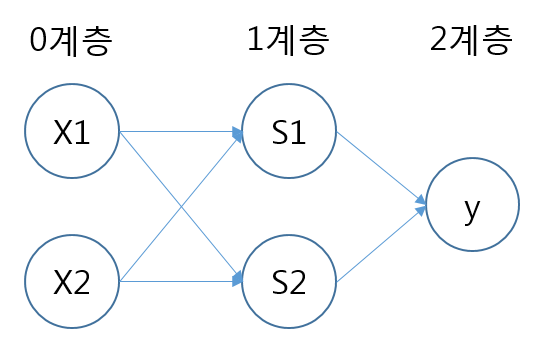

In [13]:
Image(filename='xor1.PNG')

다층 퍼셉트론은 지금까지 보아온 회로보다 복잡한 회로를 만들 수 있음 (예를들어 가산기, 인코더 및 컴퓨터마저 표현 가능)

실제로 NAND 게이트의 조합으로 컴퓨터가 수행하는 일을 재현할 수 있음

이론 상으로 2층 퍼셉트론 (정확히 비선형인 시그모이드) 이면 컴퓨터를 만들 수 있다고 하고 3장에서 그 부분을 배울 것 임